In [12]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

In [13]:
def ScatterPlot(X, Y, assignments=None, centers=None):
    
    if assignments is None:
        assignments = [0] * len(X)
    
    fig = plt.figure(figsize=(14,8))
    
    cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
    
    plt.scatter(X, Y, c=assignments, cmap=cmap)
   
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), marker='+', s=400, cmap=cmap)  
    
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.show()

[[ 65.78 112.99]
 [ 71.52 136.49]
 [ 69.4  153.03]
 [ 68.22 142.34]]


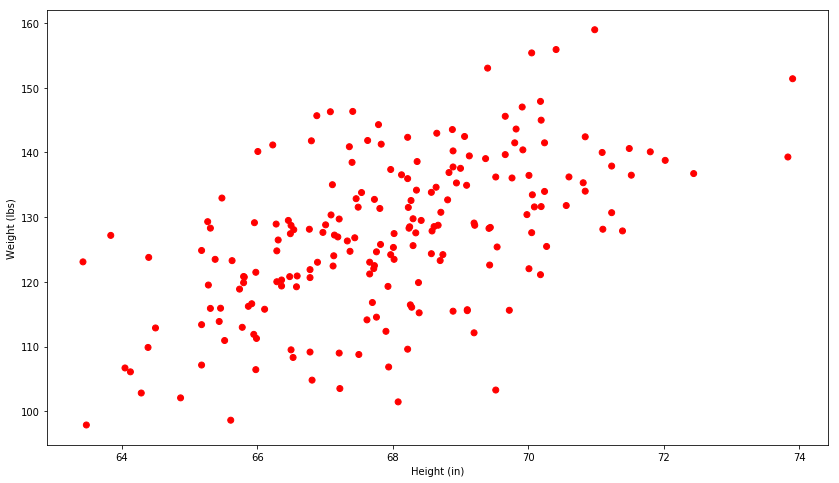

In [14]:
data = np.loadtxt('../../data/12_Kmeans/km_data.csv', delimiter=',')[:, 1:]
print(data[:4])
    
ScatterPlot(data[:, 0], data[:, 1])

In [15]:
k = 3

def input_fn():
    return tf.constant(data, tf.float32, data.shape), None

In [16]:
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=k, relative_tolerance=0.0001)

_ = kmeans.fit(input_fn=input_fn)

clusters = kmeans.clusters()

assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

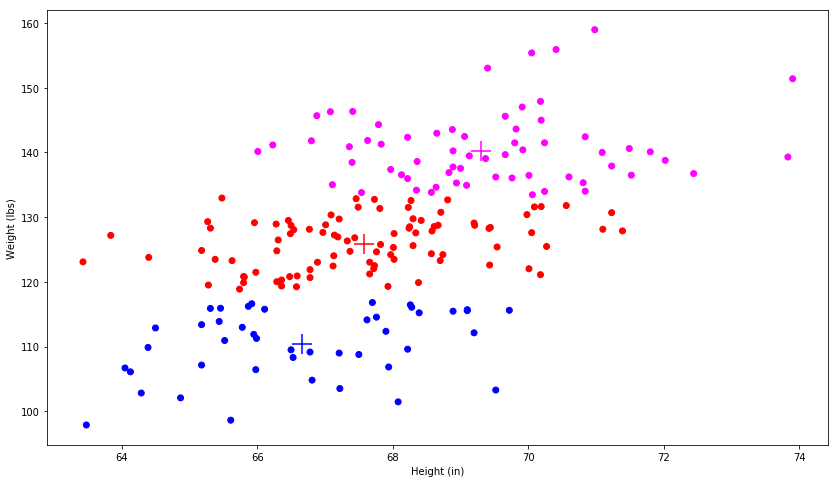

In [17]:
ScatterPlot(data[:, 0], data[:, 1], assignments, clusters)